<a href="https://colab.research.google.com/github/yash-3/machine-learning/blob/main/Image_Compression_Using_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task**: Perform the comparison analysis of the image compression with information retrieval over your own image for the values of K=1 to 20

In [1]:
import numpy as np                  #To Prform Numerical Operation
import matplotlib.pyplot as plt     #plot something 
import pandas as pd                 #To Play With Dataset
import cv2                          # computer vision version-2 used for read image
import matplotlib.image as mpimg     #used for image plotting
import random                       #TO generate random number

In [2]:
from google.colab import drive  #import gogle drive data

In [3]:
drive.mount('/content/drive') # mount drive data into colab cloud and enter authentication code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd /content/drive/"My Drive/Colab Notebooks/Dataset Files"  

/content/drive/My Drive/Colab Notebooks/Dataset Files


**compression or dimension reduction on Image**

Text(0.5, 1.0, 'Original Image')

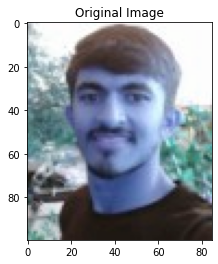

In [5]:
# Read image from Google Drive
original_image = cv2.imread('yash_1.jpg')
plt.imshow(original_image)
plt.title("Original Image")

In [6]:
original_image   # get pixel value and RGB value

array([[[199, 204, 207],
        [206, 211, 214],
        [227, 230, 234],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[161, 166, 169],
        [184, 189, 192],
        [219, 222, 226],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[148, 155, 158],
        [178, 185, 188],
        [215, 220, 221],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       ...,

       [[ 95, 137, 130],
        [109, 156, 147],
        [108, 164, 153],
        ...,
        [ 45,  33,  29],
        [ 48,  36,  32],
        [ 50,  38,  34]],

       [[109, 150, 143],
        [118, 165, 156],
        [ 97, 153, 142],
        ...,
        [ 42,  30,  26],
        [ 45,  33,  29],
        [ 47,  35,  31]],

       [[109, 150, 143],
        [127, 174, 165],
        [ 97, 153, 142],
        ...,
        [ 42,  30,  26],
        [ 45,  33,  29],
        [ 47,  35,  31]]

In [7]:
original_image.shape

(100, 85, 3)

In [8]:
original_image = (original_image/255).reshape(100*85,3)    # limits the value

In [9]:
original_image

array([[0.78039216, 0.8       , 0.81176471],
       [0.80784314, 0.82745098, 0.83921569],
       [0.89019608, 0.90196078, 0.91764706],
       ...,
       [0.16470588, 0.11764706, 0.10196078],
       [0.17647059, 0.12941176, 0.11372549],
       [0.18431373, 0.1372549 , 0.12156863]])

In [10]:
#Euclidean Distance
def cal_distance(x1,x2):
    return (sum((x1-x2)**2))**0.5

In [11]:
# get closest centroid to each data
def findClosestCentroid(c,x):
    assign_centroid=[]
    for i in x:
        distance=[]
        for j in c:
            distance.append(cal_distance(i,j))
        assign_centroid.append(np.argmin(distance))
    return assign_centroid


In [12]:
# Calculate new Centroids by calculating mean of each cluster
def cal_centroids(cluster,x):
    new_centroid=[]
    new_df1=pd.concat([pd.DataFrame(x),pd.DataFrame(cluster,columns=['cluster'])],axis=1)
    for c in set(new_df1['cluster']):             #return unique value of cluster (set function used)
        current_cluster = new_df1[new_df1['cluster']==c][new_df1.columns[:-1]]      #considering all X and Y values for particular cluster 'C'
        current_mean = current_cluster.mean(axis=0)
        new_centroid.append(current_mean)

    return new_centroid

In [13]:
epoch=15

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

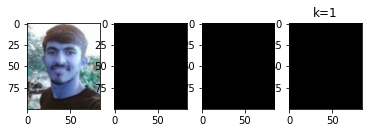

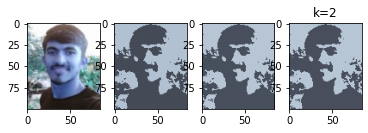

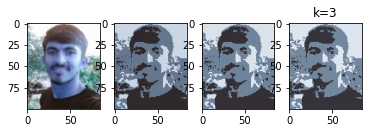

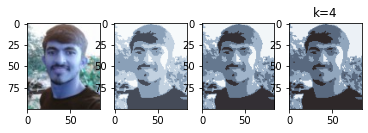

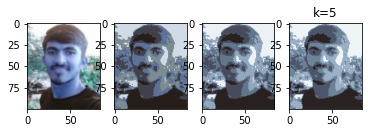

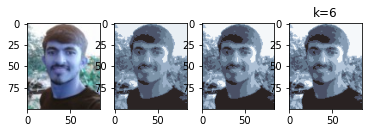

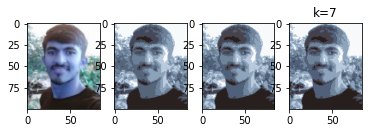

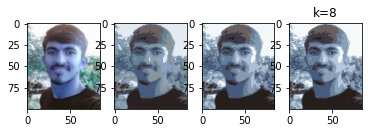

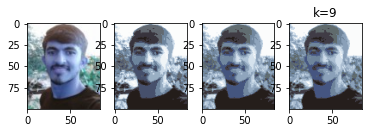

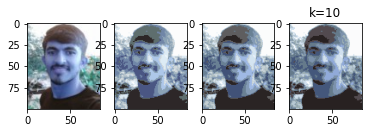

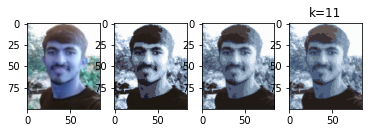

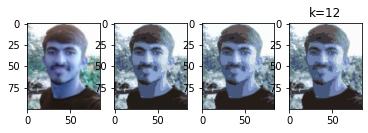

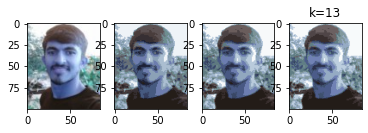

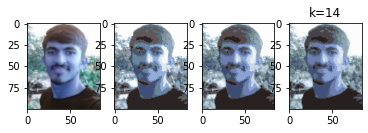

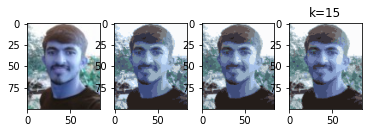

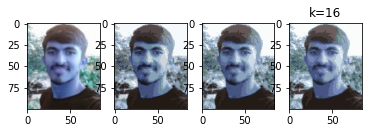

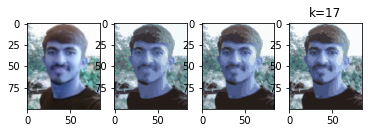

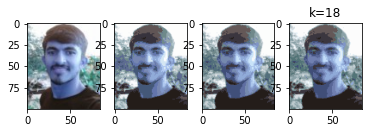

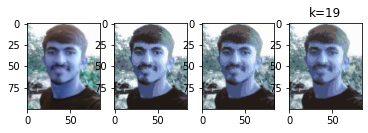

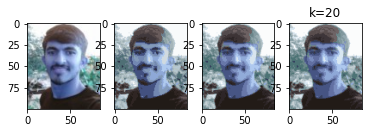

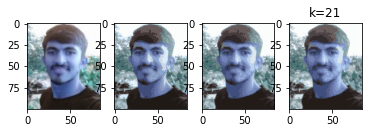

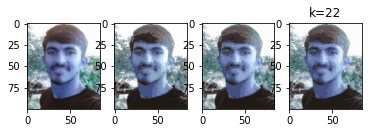

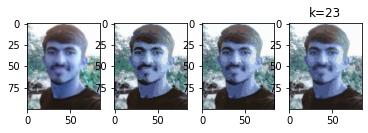

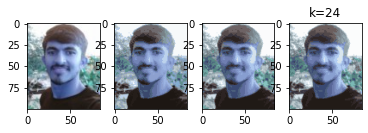

In [14]:
# number of centroids: k range from 1 to 25
for k in range(1,25):
    original_image = (original_image/255).reshape(100*85,3) 

    init_centroids = random.sample(range(0,len(original_image)),k)      # 2nd argument indicate number of centroids

    # get actual value of centroids from index 
    centroids=[]
    for i in init_centroids:
        centroids.append(original_image[i]) 

    # convert dataframe to array
    centroids=np.array(centroids)

    new_centroids_arr= []
    for i in range(epoch):
        #print(i)
        get_centroids = findClosestCentroid(centroids, original_image)
        centroids = cal_centroids(get_centroids, original_image)

        if(i==1):
            new_centroids_arr.append(centroids)
        if(i== (epoch//2)):
            new_centroids_arr.append(centroids)

    # get image when  number of epoch=1
    recovered_img_1 = original_image.copy()
    for i in range(len(original_image)):
        recovered_img_1[i] = new_centroids_arr[0][get_centroids[i]]
    recovered_img_1 = recovered_img_1.reshape(100,85,3)

    # get image when  number of epoch= (epoch/2)
    recovered_img_2 = original_image.copy()
    for i in range(len(original_image)):
        recovered_img_2[i] = new_centroids_arr[1][get_centroids[i]]
    recovered_img_2 = recovered_img_2.reshape(100,85,3)

    # get image when  number of epoch='epoch'
    recovered_img_3 = original_image.copy()
    for i in range(len(original_image)):
        recovered_img_3[i] = centroids[get_centroids[i]]
    recovered_img_3 = recovered_img_3.reshape(100,85,3)

    # Plotting Images 
    original_image = cv2.imread('yash_1.jpg')
    fig,ax = plt.subplots(1,4)
    plt.title('k='+str(k))
    ax[0].imshow(original_image)
    ax[1].imshow(recovered_img_1)
    ax[2].imshow(recovered_img_2)
    ax[3].imshow(recovered_img_3)